In [5]:
pip install pandas numpy seaborn matplotlib plotly scikit-learn folium textblob nltk


     ------------------------------------ 110.9/110.9 kB 459.6 kB/s eta 0:00:00
     -------------------------------------- 624.3/624.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 88.4/88.4 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
dataset=pd.read_csv("UberDataset.csv")

In [44]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [9]:
dataset.shape

(1156, 7)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [12]:
dataset['PURPOSE'].fillna('NOT',inplace=True)

In [13]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
dataset['START_DATE']=pd.to_datetime(dataset['START_DATE'], errors='coerce');
dataset['END_DATE']=pd.to_datetime(dataset['END_DATE'], errors='coerce');

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [84]:
from datetime import datetime
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['date'] = dataset['START_DATE'].dt.date
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')
dataset['date'] = dataset['END_DATE'].dt.date

In [17]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [92]:
import pandas as pd
from datetime import datetime

# Extract the hour from START_DATE (since it is a datetime column)
dataset['hour'] = pd.to_datetime(dataset['START_DATE']).dt.hour

# Categorizing time into Morning, Afternoon, Evening, and Night
dataset['day-night'] = pd.cut(
    x=dataset['hour'], 
    bins=[0, 10, 16, 20, 24],  
    labels=['Morning', 'Afternoon', 'Evening', 'Night'],
    include_lowest=True
)

# Display results
print(dataset[['hour', 'day-night']].head())


   hour  day-night
0  21.0      Night
1   1.0    Morning
2  20.0    Evening
3  17.0    Evening
4  14.0  Afternoon


In [94]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [21]:
dataset.dropna(inplace=True)

In [22]:
dataset.shape

(413, 10)

# Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

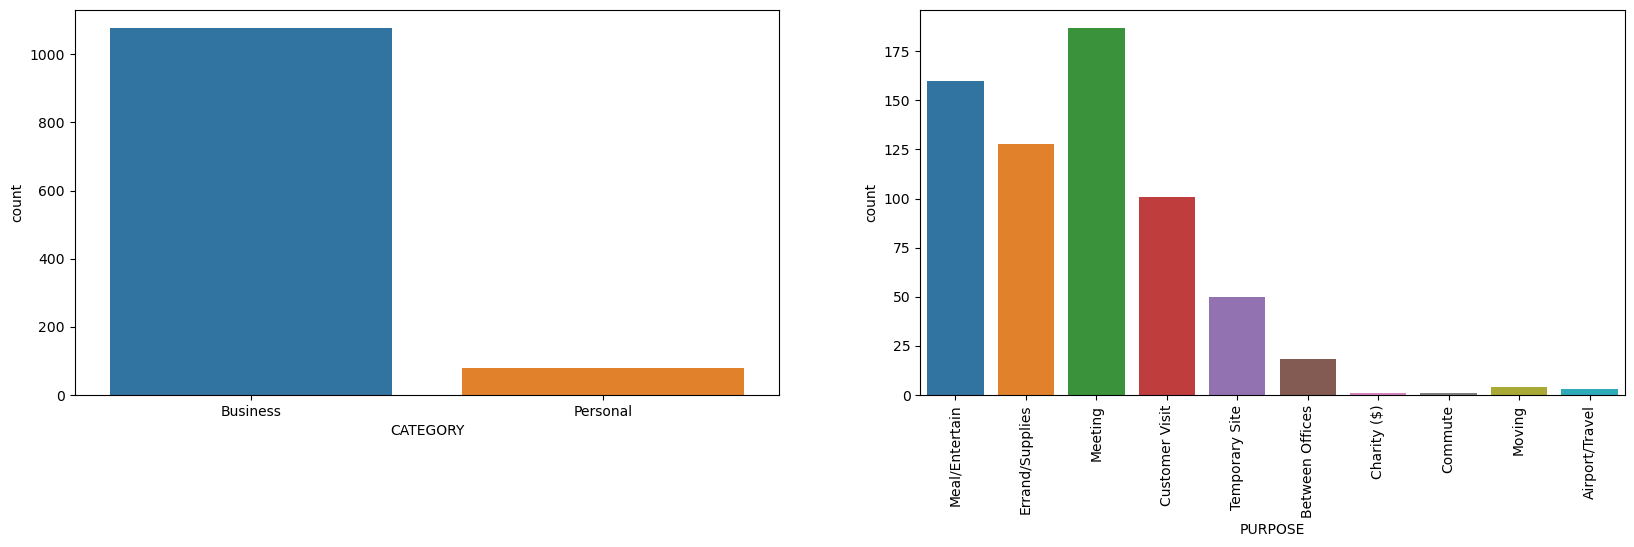

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

sns.countplot(x='CATEGORY', data=dataset) 
plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=dataset)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

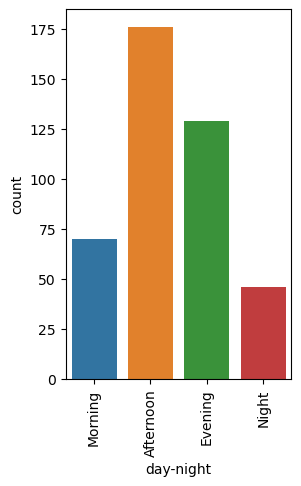

In [96]:
plt.subplot(1,2,2)
sns.countplot(x='day-night', data=dataset)
plt.xticks(rotation=90)

In [99]:
dataset['MONTH'] = pd.to_datetime(dataset['START_DATE']).dt.month

month_label={1.0:"Jan", 2.0:"Feb", 3.0:"Mar", 4.0:"Apr",5.0:"May",6.0:"Jun",7.0:"Jul",8.0:"Aug",9.0:"Sep",10.0:"Oct",11.0:"Nov",12.0:"Dec"}
dataset["MONTH"]=dataset.MONTH.map(month_label)
mon=dataset.MONTH.value_counts(sort=False)

In [101]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


C:\Users\91842\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91842\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

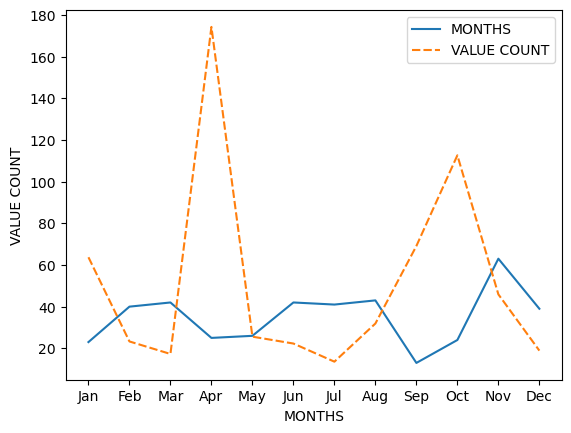

In [108]:
df=pd.DataFrame({
    "MONTHS":mon.values,
    "VALUE COUNT": dataset.groupby('MONTH',sort=False)['MILES'].max()
})


p=sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [110]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [114]:
dataset['DAY']=dataset.START_DATE.dt.weekday
day_label = {
    0:'Mon',  1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
dataset['DAY']=dataset['DAY'].map(day_label)

In [116]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'COUNT')

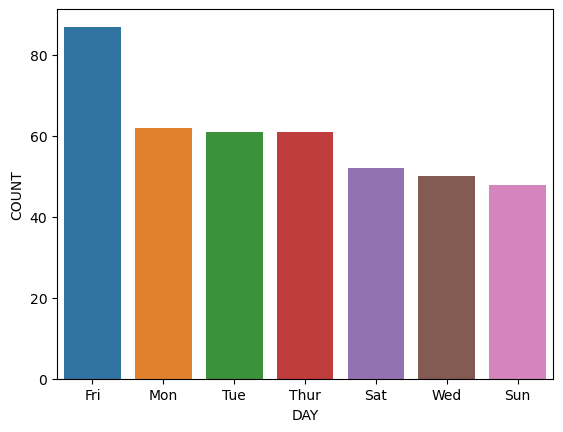

In [117]:
day_label=dataset.DAY.value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [118]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,hour,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'MILES')

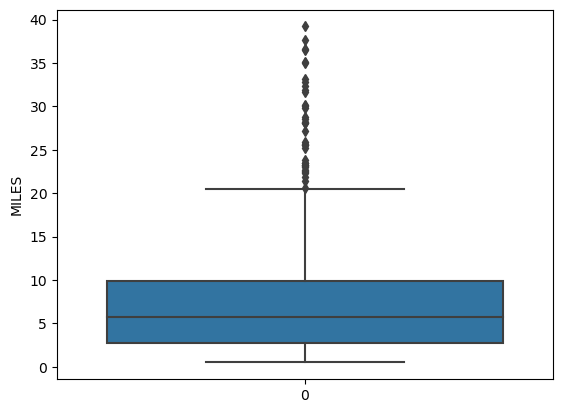

In [122]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])
plt.ylabel('MILES')

C:\Users\91842\AppData\Local\Temp\ipykernel_29236\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])
C:\Users\91842\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MILES', ylabel='Density'>

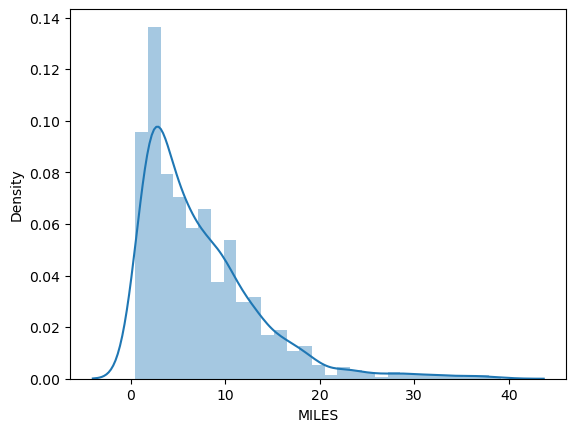

In [123]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import folium
from folium.plugins import HeatMap
from textblob import TextBlob

In [2]:
df = pd.read_csv('fare.csv')

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df.dropna(subset=['pickup_datetime'], inplace=True)

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month

In [9]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8


In [10]:
df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df.dropna(subset=['passenger_count', 'fare_amount'], inplace=True)

In [11]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8


In [12]:
predictor_variables = df[['hour', 'weekday', 'month', 'passenger_count']]
target_variable = df['fare_amount']

In [13]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictor_variables, target_variable, test_size=0.2, random_state=42
)

In [14]:
regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
regression_model.fit(predictors_train, target_train)

RandomForestRegressor(random_state=42)

In [15]:
target_predictions = regression_model.predict(predictors_test)

In [16]:
error_metric = mean_absolute_error(target_test, target_predictions)
print("Mean Absolute Error (Fare Prediction):", error_metric)

Mean Absolute Error (Fare Prediction): 6.326336795494726


In [17]:
df.dropna(subset=['pickup_latitude', 'pickup_longitude'], inplace=True)
location_data = df[['pickup_latitude', 'pickup_longitude']].sample(min(1000, len(df)))

In [18]:
location_map = folium.Map(
    location=[location_data['pickup_latitude'].mean(), location_data['pickup_longitude'].mean()],
    zoom_start=12,
)

In [19]:
HeatMap(location_data.values).add_to(location_map)
location_map

In [24]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow keras

  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
  Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
     -------------------------------------- 390.0/390.0 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 434.5/434.5 kB 6.8 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.5 MB/s eta 0:00:00
     --

In [3]:
from prophet import Prophet
import pandas as pd

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
df = pd.read_csv('fare.csv')

In [5]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df.dropna(subset=['pickup_datetime'], inplace=True)
df['timestamp'] = df['pickup_datetime'].dt.floor('H')
demand_counts = df.groupby('timestamp').size().reset_index(name='demand')

NameError: name 'pd' is not defined

In [14]:
df['timestamp'] = df['pickup_datetime'].dt.floor('H')
demand_counts = df.groupby(['timestamp']).size().reset_index(name='demand')

In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,timestamp
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,2015-05-07 19:00:00+00:00
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2009-07-17 20:00:00+00:00
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,2009-08-24 21:00:00+00:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,2009-06-26 08:00:00+00:00
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,2014-08-28 17:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10,2012-10-28 10:00:00+00:00
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,4,3,2014-03-14 01:00:00+00:00
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0,6,2009-06-29 00:00:00+00:00
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,2,5,2015-05-20 14:00:00+00:00


In [13]:
pip install pystan==2.19.1.1

     ---------------------------------------- 16.2/16.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\91842\AppData\Local\Temp\pip-install-0ugsu_zf\pystan_6b01ef30fcf2460c9343321afce781c9\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [14]:
pip install cmdstanpy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install fbprophet

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\91842\AppData\Local\Temp\pip-install-hyennnfu\pystan_352d0c901d874c8ca86b465374cc8366\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



     -------------------------------------- 64.0/64.0 kB 344.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.8/2.8 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 442.4/442.4 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 91.8/91.8 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 173.7/173.7 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 155.4/155.4 kB 9.7 MB/s eta 0:00:00
     -------------------------------------- 411.7/411.7 kB 3.7 MB/s eta 0:00:00
 

In [16]:
pip install prophet

In [6]:
pip install --upgrade pip


     ---------------------------------------- 1.8/1.8 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [7]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 2.1/124.9 MB 3.9 MB/s eta 0:00:32
    --------------------------------------- 2.6/124.9 MB 3.4 MB/s eta 0:00:37
   - -------------------------------------- 3.7/124.9 MB 3.7 MB/s eta 0:00:33
   - -------------------------------------- 5.0/124.9 MB 4.2 MB/s eta 0:00:29
   -- ------------------------------------- 6.6/124.9 MB 4.6 MB/s eta 0:00:26
   -- ------------------------------------- 7.9/124.9 MB 4.9 MB/s eta 0:00:24
   -- ------------------------------------- 9.2/124.9 MB 5.1 MB/s eta 0:00:23
   --- ------------------------------------ 10.7/124.9 MB 5.3 MB/s eta 0:00:22
   --- ------------------------------------ 12.1/124.9 MB 5.4 MB/s eta 0:00:21
   --

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_absolute_error
import folium
from folium.plugins import HeatMap
from textblob import TextBlob
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.cluster import KMeans
import xgboost as xgb

df = pd.read_csv("fare.csv")
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce').dropna()
df['hour'], df['weekday'], df['month'] = df['pickup_datetime'].dt.hour, df['pickup_datetime'].dt.weekday, df['pickup_datetime'].dt.month
df = df.dropna(subset=['hour', 'weekday', 'month', 'passenger_count', 'fare_amount', 'pickup_latitude', 'pickup_longitude'])

demand_counts = df.groupby(df['pickup_datetime'].dt.floor('H')).size().reset_index(name='demand').rename(columns={'pickup_datetime': 'timestamp'})

predictor_variables = df[['hour', 'weekday', 'month', 'passenger_count']]
target_variable = df['fare_amount']
predictors_train, predictors_test, target_train, target_test = train_test_split(predictor_variables, target_variable, test_size=0.2, random_state=42)

regression_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(predictors_train, target_train)
print("Mean Absolute Error (Fare Prediction):", mean_absolute_error(target_test, regression_model.predict(predictors_test)))

location_map = folium.Map(location=[df['pickup_latitude'].mean(), df['pickup_longitude'].mean()], zoom_start=12)
HeatMap(df[['pickup_latitude', 'pickup_longitude']].sample(min(1000, len(df))).values).add_to(location_map)
location_map

reviews = ["Great ride!", "Horrible experience, driver was rude!", "Very smooth ride", "Too expensive for the distance!"]
for review in reviews: print(f"Review: {review} | Sentiment Score: {TextBlob(review).sentiment.polarity}")

arima_model = ARIMA(demand_counts['demand'], order=(5, 1, 0)).fit()
demand_counts['arima_forecast'] = arima_model.forecast(steps=24)

print("Time-Series Forecasting Completed.")

df['user_cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(df[['pickup_latitude', 'pickup_longitude']])
print("User segmentation completed.")

df['anomaly_score'] = IsolationForest(contamination=0.01, random_state=42).fit_predict(df[['fare_amount', 'passenger_count', 'hour']])
print("Anomaly Detection Completed.")

surge_predictor = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(predictors_train, target_train)
print("Future Fare Surge Prediction Completed.")

optimal_taxi_allocation = df.groupby(['hour', 'weekday']).size().reset_index(name='taxi_demand').sort_values(by='taxi_demand', ascending=False)
print("Optimal taxi allocation completed.")

Mean Absolute Error (Fare Prediction): 6.326336795494726
Review: Great ride! | Sentiment Score: 1.0
Review: Horrible experience, driver was rude! | Sentiment Score: -0.6875
Review: Very smooth ride | Sentiment Score: 0.52
Review: Too expensive for the distance! | Sentiment Score: -0.625
Time-Series Forecasting Completed.
User segmentation completed.
Anomaly Detection Completed.
Future Fare Surge Prediction Completed.
Optimal taxi allocation completed.


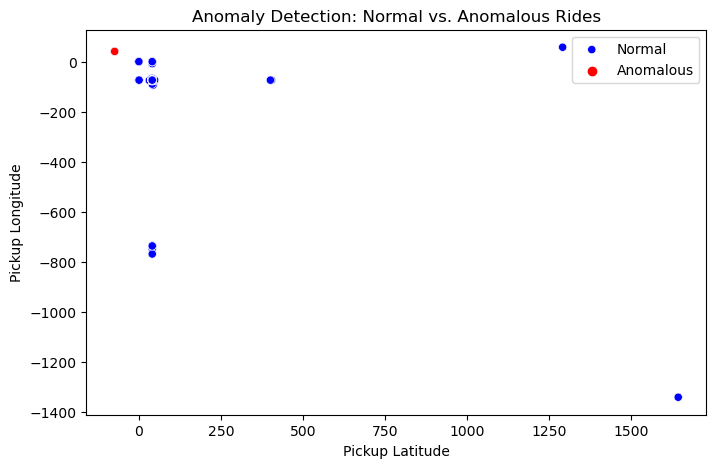

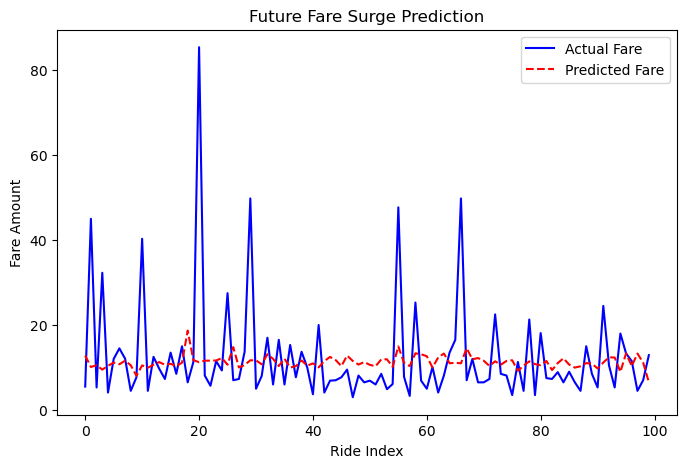

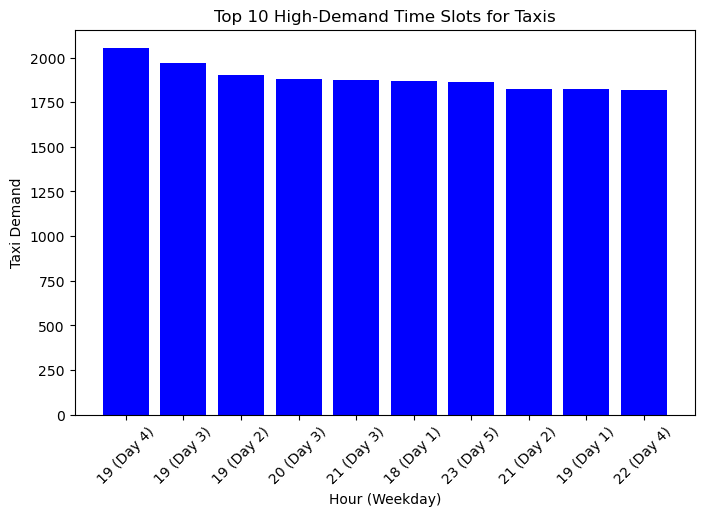

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'], hue=df['anomaly_score'], palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection: Normal vs. Anomalous Rides')
plt.xlabel('Pickup Latitude')
plt.ylabel('Pickup Longitude')
plt.legend(['Normal', 'Anomalous'])
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(target_test.values[:100], label="Actual Fare", color='blue')
plt.plot(future_surge[:100], label="Predicted Fare", color='red', linestyle='dashed')
plt.title('Future Fare Surge Prediction')
plt.xlabel('Ride Index')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

top_demand_hours = optimal_taxi_allocation.nlargest(10, 'taxi_demand')


plt.figure(figsize=(8, 5))
plt.bar(top_demand_hours['hour'].astype(str) + ' (Day ' + top_demand_hours['weekday'].astype(str) + ')',
        top_demand_hours['taxi_demand'], color='blue')

plt.xlabel("Hour (Weekday)")
plt.ylabel("Taxi Demand")
plt.title("Top 10 High-Demand Time Slots for Taxis")
plt.xticks(rotation=45)
plt.show()

